In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Module 1: Importing Data Sets
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Display the data types of each column
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
#describe to obtain a statistical summary of the dataframe.
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
#check for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#Handle missing data:

#For continuous attributes (e.g., age), replace missing values with the mean.
#For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
#Update the data types of the respective columns.
#Verify the update using df.info().

# smoker is a categorical attribute, replace with most frequent entry
#is_smoker = df['smoker'].value_counts().idxmax()
#df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
#mean_age = df['age'].astype('float').mean(axis=0)
#df["age"].replace(np.nan, mean_age, inplace=True)
# Update data types
#df[["age","smoker"]] = df[["age","smoker"]].astype("int")

#print(df.info())

In [11]:
#Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.
unique_area=df["area"].value_counts()
unique_area.to_frame()

,area
6000,24
3000,14
4500,13
4000,11
5500,9
...,...
6862,1
4815,1
9166,1
6321,1


<Axes: xlabel='furnishingstatus', ylabel='price'>

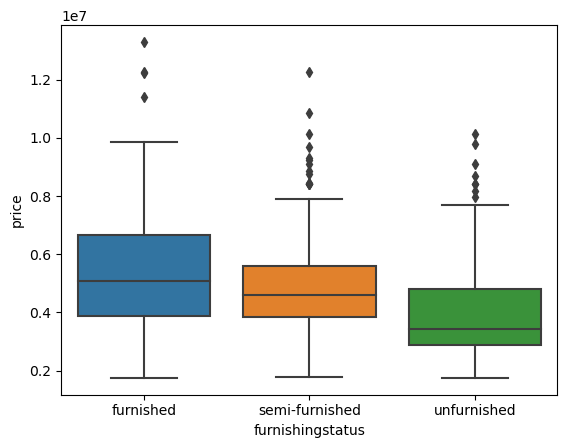

In [12]:
#Use the function boxplot in the seaborn library to determine whether furnished houses or unfurnished houses  have more price outliers

sns.boxplot(x="furnishingstatus", y="price", data=df)

<Axes: xlabel='airconditioning', ylabel='price'>

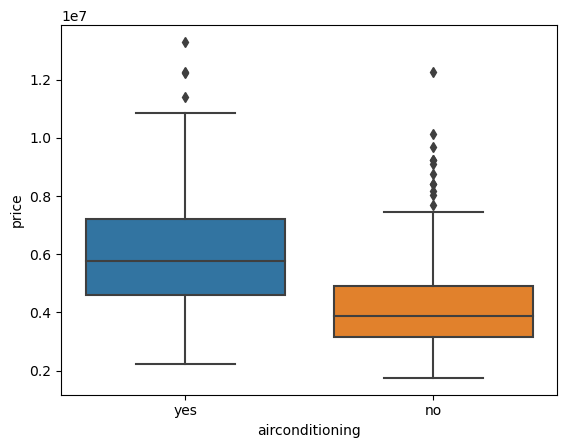

In [19]:
#Use the function boxplot in the seaborn library to determine whether houses with airconditioning or without airconditioning have more price outliers

sns.boxplot(x="airconditioning", y="price", data=df)

(0.0, 13877500.0)

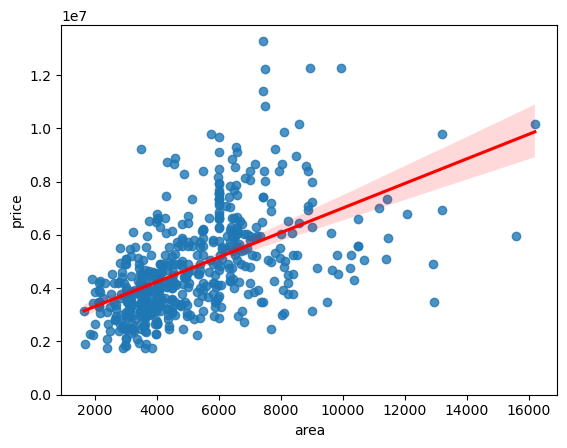

In [13]:
#Use the function regplot in the seaborn library to determine if the feature area is negatively or positively correlated with price


sns.regplot(x="area", y="price", data=df, line_kws={"color": "red"})
plt.ylim(0,)

In [15]:
#Print the correlation matrix for the dataset.

print(df.corr(numeric_only=True))


              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


In [18]:
#We can use the Pandas method corr() to find the feature other than price that is most correlated with price.
df.corr()['price'].sort_values()

C:\Users\SilverOak\AppData\Local\Temp\ipykernel_30404\1007648048.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


bedrooms     0.366494
parking      0.384394
stories      0.420712
bathrooms    0.517545
area         0.535997
price        1.000000
Name: price, dtype: float64

In [20]:
#Module 4: Model Development

#We can Fit a linear regression model using the longitude feature 'area' and caculate the R^2.
X = df[['area']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.2872931546811469


In [24]:
Z = df[["bedrooms", "bathrooms", "stories", "parking"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.43554332400085216


In [27]:
#Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.


from sklearn.metrics import mean_squared_error, r2_score
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))


0.4671477118897033


In [33]:
#Task 5 : Model Refinement
#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 109
number of training samples: 436


In [31]:
#Initialize a Ridge regressor that used hyperparameter  
#α=0.1Fit the model using training data data subset. Print the  R2score for the testing data.
from sklearn.linear_model import LinearRegression, Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.3698157785130972


In [32]:
#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the  
#R2score for the testing subset.
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.39537778043600624
